# Statistics Visualization for Species Identifier

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from itertools import chain
from PIL import Image
import os

In [9]:
csv_file = "../test_dataset/viewpoint_classifier/output_with_viewpoint.csv"

def parse_viewpoints(cell_value):
    """
    Returns a list of orientations in lowercase.
    Empty or NaN cells -> returns an empty list.
    """
    if pd.isna(cell_value) or str(cell_value).strip() == '':
        return []  # No orientations predicted or provided
    # Split by comma, strip whitespace, and convert to lowercase
    return [orient.strip().lower() for orient in cell_value.split(',')]

df = pd.read_csv(csv_file)

df['viewpoint_true'] = df['viewpoint gt'].apply(parse_viewpoints)
df['viewpoint_pred'] = df['predicted_viewpoint'].apply(parse_viewpoints)

all_gt_viewpoints = list(chain.from_iterable(df['viewpoint_true']))
all_pred_viewpoints = list(chain.from_iterable(df['viewpoint_pred']))

gt_individual_counts = pd.Series(all_gt_viewpoints).value_counts()
pred_individual_counts = pd.Series(all_pred_viewpoints).value_counts()

# 5. Count combined (multi-label) orientations
#    Sort them alphabetically so "Right, Front" and "Front, Right" both become "front, right"
df['gt_combined'] = df['viewpoint_true'].apply(
    lambda x: ', '.join(sorted(x)) if x else 'none'
)
df['pred_combined'] = df['viewpoint_pred'].apply(
    lambda x: ', '.join(sorted(x)) if x else 'none'
)

gt_combined_counts = df['gt_combined'].value_counts()
pred_combined_counts = df['pred_combined'].value_counts()

# 6. Print out the results
print("== Ground Truth: Individual Viewpoint Counts ==")
print(gt_individual_counts, "\n")

print("== Ground Truth: Combined (Multi-Label) Viewpoint Counts ==")
print(gt_combined_counts, "\n")

print("== Predicted: Individual Viewpoint Counts ==")
print(pred_individual_counts, "\n")

print("== Predicted: Combined (Multi-Label) Viewpoint Counts ==")
print(pred_combined_counts, "\n")


== Ground Truth: Individual Viewpoint Counts ==
left     152
right    118
front     39
back      27
up         1
Name: count, dtype: int64 

== Ground Truth: Combined (Multi-Label) Viewpoint Counts ==
gt_combined
left                 108
right                 63
front, left           21
back, right           20
front, right          17
left, right           16
back, left             4
back, left, right      2
front                  1
back                   1
left, up               1
Name: count, dtype: int64 

== Predicted: Individual Viewpoint Counts ==
right    93
front    33
left     31
back     31
Name: count, dtype: int64 

== Predicted: Combined (Multi-Label) Viewpoint Counts ==
pred_combined
none            125
right            48
back, right      26
front, right     19
left             17
front, left      12
back              3
front             2
back, left        2
Name: count, dtype: int64 



In [35]:
def plot_confusion_matrix(true_labels, pred_labels, figsize = (10, 8), title=""):

    conf_matrix = confusion_matrix(
        true_labels, pred_labels, labels=true_labels.unique()
    )
    conf_matrix_df = pd.DataFrame(
        conf_matrix, index=true_labels.unique(), columns=true_labels.unique()
    )

    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average="weighted")
    recall = recall_score(true_labels, pred_labels, average="weighted")
    f1 = f1_score(true_labels, pred_labels, average="weighted")

    class_accuracy = {}
    classes = true_labels.unique()
    for ix in classes:
        correct = conf_matrix_df.loc[ix, ix]
        total = np.sum(conf_matrix_df.loc[ix, :])
        class_accuracy[ix] = correct / total

    print(f"Performance Summary: {title}")
    print("=" * 40)
    print(f"Accuracy  : {accuracy:.2f}")
    print(f"Precision : {precision:.2f}")
    print(f"Recall    : {recall:.2f}")
    print(f"F-1 Score : {f1:.2f}")

    print("-" * 40)
    print("\nClass-wise Accuracy:")
    print("-" * 40)
    for ix in classes:
        print(f"Accuracy of {ix:<20}: {class_accuracy[ix]:.2f}")
        
    plt.figure(figsize=figsize)
    sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix: {title}")
    plt.show()



c:\Users\lawre\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lawre\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lawre\AppData\Local\Temp\ipykernel_47372\3989436491.py:20: RuntimeWarning: invalid value encountered in scalar divide
  class_accuracy[ix] = correct / total


PERFORMANCE SUMMARY
Accuracy  : 0.43
Precision : 0.77
Recall    : 0.43
F-1 Score : 0.49
----------------------------------------

Class-wise Accuracy:
----------------------------------------
Accuracy of front, right        : 0.94
Accuracy of right               : 0.79
Accuracy of left                : 1.00
Accuracy of front, left         : 0.79
Accuracy of back, right         : 0.89
Accuracy of back, left          : 0.50
Accuracy of front               : 1.00
Accuracy of back                : 1.00
Accuracy of left, up            : nan
Accuracy of back, left, right   : nan
Accuracy of left, right         : nan


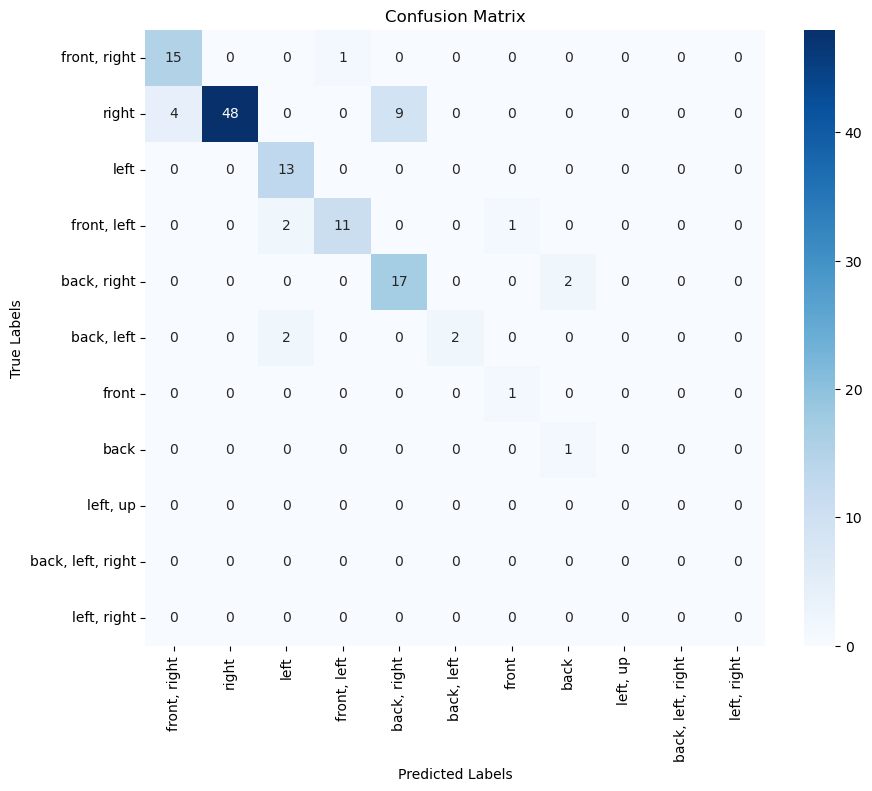

In [ ]:
plot_confusion_matrix(df['gt_combined'], df['pred_combined'], title="All Orientations")

Performance Summary: back
Accuracy  : 0.94
Precision : 0.95
Recall    : 0.94
F-1 Score : 0.95
----------------------------------------

Class-wise Accuracy:
----------------------------------------
Accuracy of none                : 0.96
Accuracy of back                : 0.81


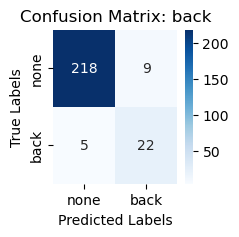

Performance Summary: down
Accuracy  : 1.00
Precision : 1.00
Recall    : 1.00
F-1 Score : 1.00
----------------------------------------

Class-wise Accuracy:
----------------------------------------
Accuracy of none                : 1.00


c:\Users\lawre\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


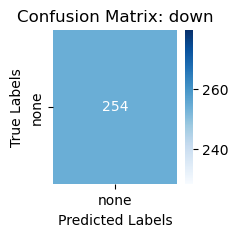

Performance Summary: front
Accuracy  : 0.94
Precision : 0.94
Recall    : 0.94
F-1 Score : 0.94
----------------------------------------

Class-wise Accuracy:
----------------------------------------
Accuracy of front               : 0.74
Accuracy of none                : 0.98


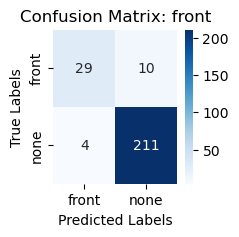

c:\Users\lawre\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performance Summary: up
Accuracy  : 1.00
Precision : 0.99
Recall    : 1.00
F-1 Score : 0.99
----------------------------------------

Class-wise Accuracy:
----------------------------------------
Accuracy of none                : 1.00
Accuracy of up                  : 0.00


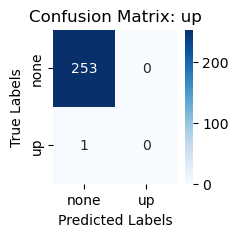

Performance Summary: right
Accuracy  : 0.90
Precision : 0.92
Recall    : 0.90
F-1 Score : 0.90
----------------------------------------

Class-wise Accuracy:
----------------------------------------
Accuracy of right               : 0.79
Accuracy of none                : 1.00


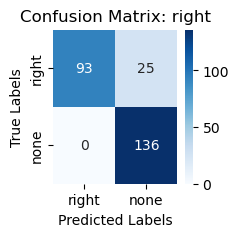

Performance Summary: left
Accuracy  : 0.52
Precision : 0.76
Recall    : 0.52
F-1 Score : 0.45
----------------------------------------

Class-wise Accuracy:
----------------------------------------
Accuracy of none                : 0.99
Accuracy of left                : 0.20


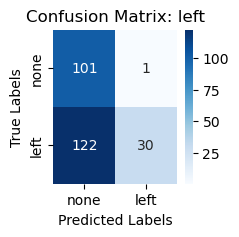

In [41]:
unique_viewpoints = {"front", "left", "right", "back", "up", "down"}

# --------------------------------
# 2) Create columns for each viewpoint in ground truth
# --------------------------------
for vp in unique_viewpoints:
    col_name = f"gt_{vp}"
    df[col_name] = df['viewpoint_true'].apply(
        lambda x: vp if vp in x else "none"
    )

# --------------------------------
# 3) Create columns for each viewpoint in predicted
# --------------------------------
for vp in unique_viewpoints:
    col_name = f"pred_{vp}"
    df[col_name] = df['viewpoint_pred'].apply(
        lambda x: vp if vp in x else "none"
    )
    
for i in unique_viewpoints:
    plot_confusion_matrix(df[f'gt_{i}'], df[f'pred_{i}'], figsize=(2,2), title=i)

# Example Misclassifications

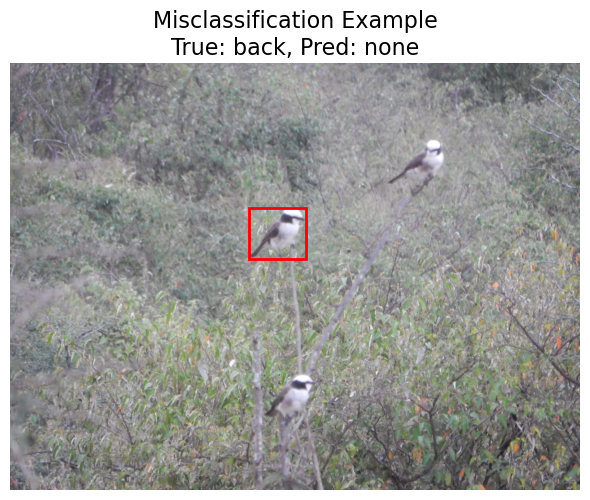

[Case A: GT has 'back', Pred does not] -> 6e9f10e2-26fd-7d5d-c5da-50eeb3b981c5.jpg


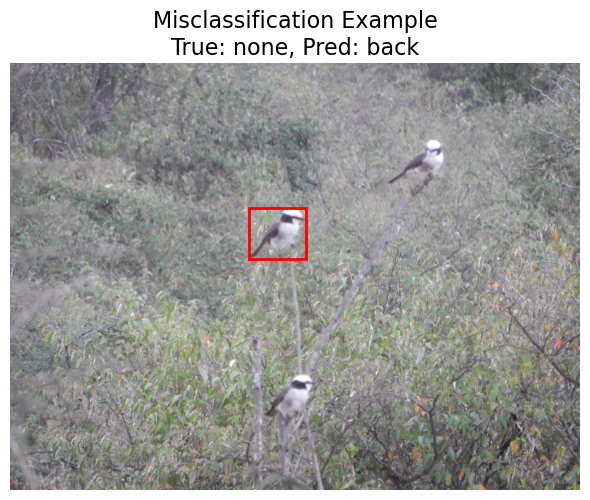

[Case B: GT does not have 'back', Pred does] -> da63a11e-ffff-b0cb-36fe-b69a6599289d.jpg


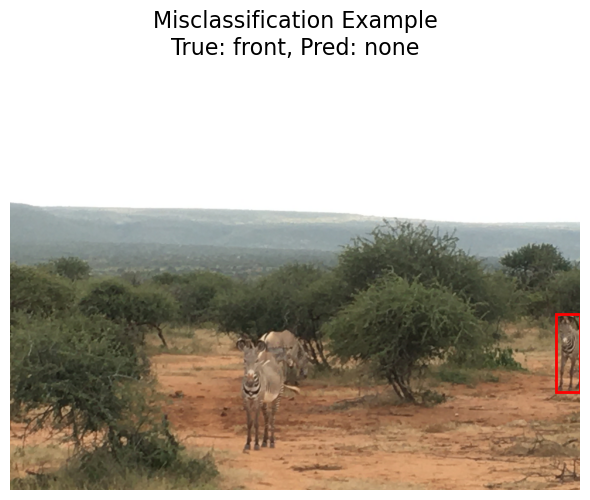

[Case A: GT has 'front', Pred does not] -> 17651f23-f3be-d9f2-95e4-45241aa3514c.jpg


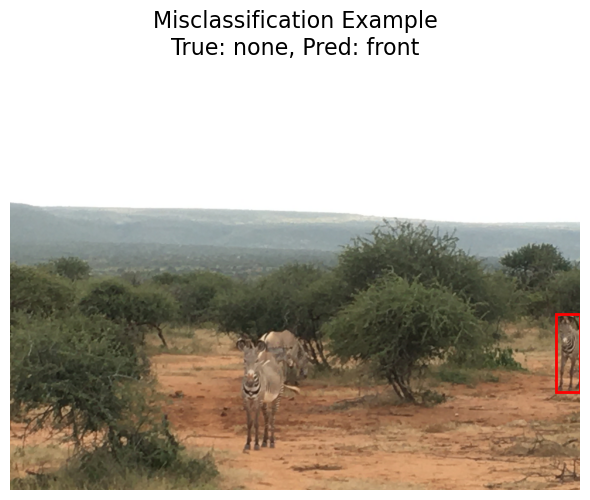

[Case B: GT does not have 'front', Pred does] -> 07b908f3-6f73-654f-bc95-a9e2658b9cca.jpg


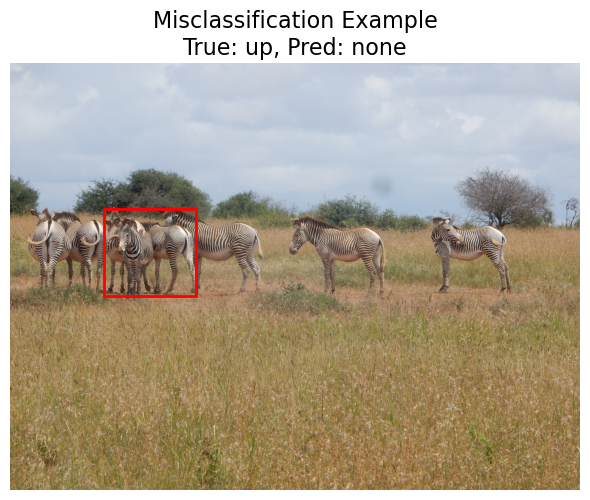

[Case A: GT has 'up', Pred does not] -> 3f7a129f-ccba-5ffa-f08b-3f6d7926a624.jpg


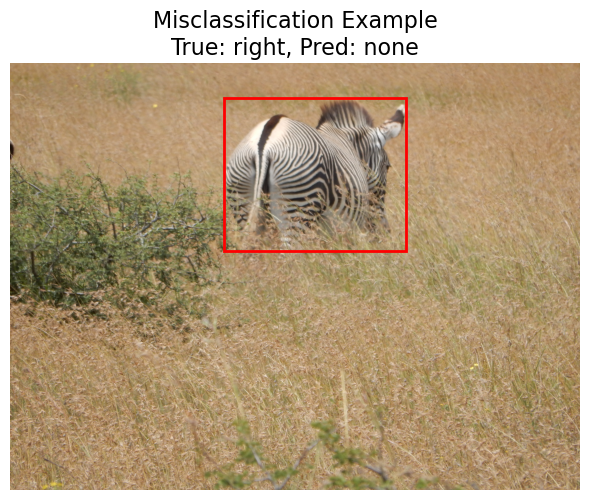

[Case A: GT has 'right', Pred does not] -> 7cebb60e-ffdb-f123-7a0f-214fe4e0d225.jpg


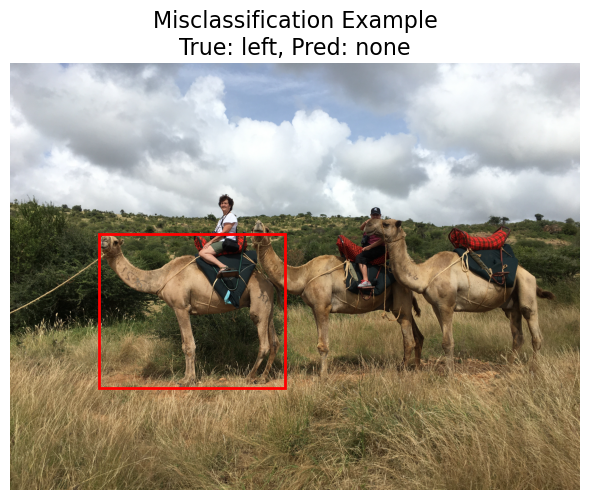

[Case A: GT has 'left', Pred does not] -> f16245e4-33aa-3d29-adbb-daf7f909eb35.jpg


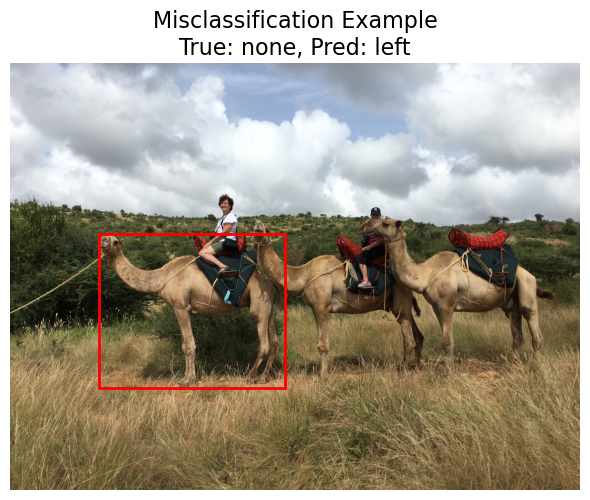

[Case B: GT does not have 'left', Pred does] -> cb2e5cc1-abde-5b9d-d5b7-be9ea477e4de.jpg


In [ ]:
images_dir = "../test_dataset/images"
def show_annotation(filename, bbox, true_class, pred_class):
    img_path = os.path.join(images_dir, filename)
    x, y, w, h = bbox
    img = Image.open(img_path).convert("RGB")

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(img)
    
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    ax.set_title(f"Misclassification Example\nTrue: {true_class}, Pred: {pred_class}", fontsize=16)
    ax.axis('off')

    plt.tight_layout()
    plt.show()
    
for viewpoint in unique_viewpoints:
    # CASE A: viewpoint in GT but NOT in Pred
    mismatch_case_a = df[
        df['viewpoint_true'].apply(lambda x: viewpoint in x) &
        df['viewpoint_pred'].apply(lambda x: viewpoint not in x)
    ]
    if not mismatch_case_a.empty:
        example_a = mismatch_case_a.sample(1)
        img_fname_a = example_a['image fname'].values[0]
        show_annotation(example_a['image fname'].values[0], [
            example_a['bbox x'].values[0],
            example_a['bbox y'].values[0],
            example_a['bbox w'].values[0],
            example_a['bbox h'].values[0]], viewpoint, "none")

    # CASE B: viewpoint NOT in GT but in Pred
    mismatch_case_b = df[
        df['viewpoint_true'].apply(lambda x: viewpoint not in x) &
        df['viewpoint_pred'].apply(lambda x: viewpoint in x)
    ]
    if not mismatch_case_b.empty:
        example_b = mismatch_case_b.sample(1)
        img_fname_b = example_b['image fname'].values[0]
        show_annotation(example_a['image fname'].values[0], [
            example_a['bbox x'].values[0],
            example_a['bbox y'].values[0],
            example_a['bbox w'].values[0],
            example_a['bbox h'].values[0]],"none", viewpoint)

    # If both cases are empty for this viewpoint, nothing prints, effectively skipping.